In [43]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 as cv

In [44]:
# read an img into a ndarray
def get_img(file):
    img = Image.open(file)
    return np.asarray(img)

# show an img
def show_img(arr):
    plt.imshow(arr)
    plt.show()
# show hist
def hist(arr):
    color = ('b','g','r')
    for i,col in enumerate(color):
        histr = cv.calcHist([arr],[i],None,[225],[0,225])
        plt.plot(histr,color = col)
        plt.xlim([0,225])
        plt.ylim([0,2000])
    plt.hist(arr.ravel(),225,[0,225]); 
    plt.show()
    
    

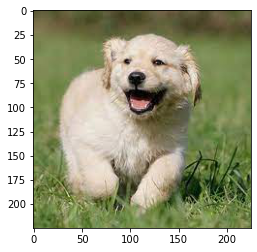

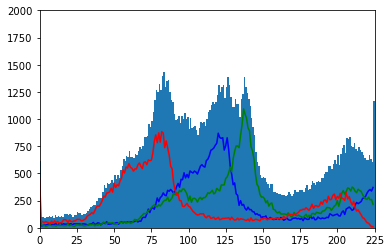

In [45]:
arr = get_img('img.jpg')
show_img(arr)

hist(arr)

# Random rotation

In [47]:
def random_rotation(arr,teta=np.random.uniform(0,2*np.pi)):
    #------------------#
    x,y,z=arr.shape
    matrice_rot=np.array([[np.cos(teta),-np.sin(teta)],[np.sin(teta),np.cos(teta)]],dtype='float')
    #New_shape_resultat
    n_height= int(abs(x*np.cos(teta))+abs(y*np.sin(teta)))+1
    n_width = int(abs(y*np.cos(teta))+abs(x*np.sin(teta)))+1
    arr_bis=np.zeros((n_height,n_width, 3),dtype='uint8')
   #Centres_image_Original
    org_c_height = int(((x+1)/2)-1)  
    org_c_width = int(((y+1)/2)-1)  
   #Centres_image_Nouveau
    n_c_height= int(((n_height+1)/2)-1) 
    n_c_width= int(((n_width+1)/2)-1) 

    
    for i in range(x):
        for j in range(y):
            vect=np.array([x-i-org_c_height,y-j-org_c_width])
            nv=np.dot(matrice_rot,vect)
            arr_bis[n_c_height-1-int(nv[0]),n_c_width-1-int(nv[1])]=arr[i,j]
    return arr_bis

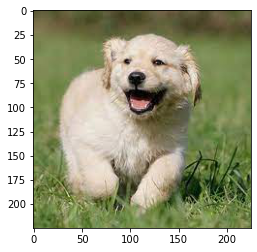

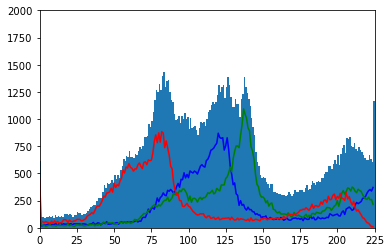

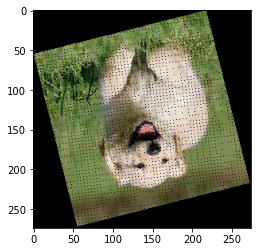

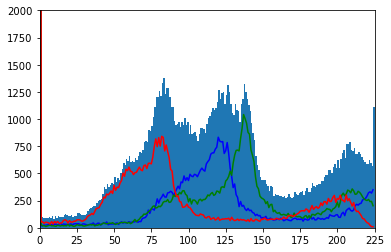

In [48]:
arr_rotated = random_rotation(arr)
show_img(arr);
hist(arr);


show_img(arr_rotated);

hist(arr_rotated);

In [49]:
for i in range(3):
    print(i)

0
1
2


# Flipping

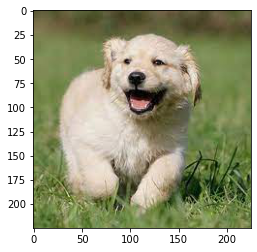

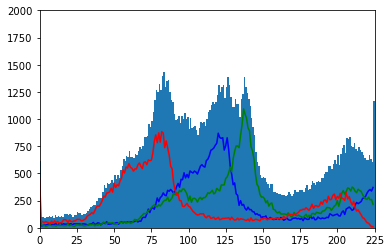

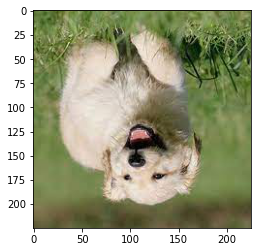

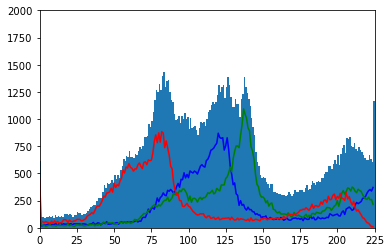

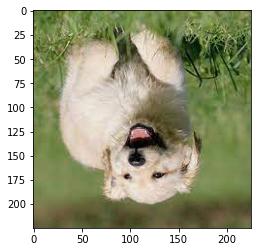

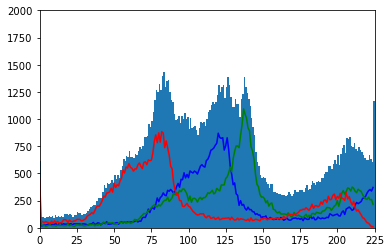

In [51]:
def vertical_flipping(arr):
    return np.fliplr(arr)

def horizontal_flipping(arr):
    return np.flipud(arr)


def vertical_flipping_bis(arr):
    x, y, z = arr.shape
    arr_bis = arr.copy()
    for i in range(1, x):
        arr_bis[i] = arr[x - i]
    return arr_bis

def horizontal_flipping_bis(arr):
    x, y, z = arr.shape
    arr_bis = arr.copy()
    for i in range(1, y):
        arr_bis[i][:] = arr[x - i][:]
    return arr_bis


arr_v_flipped = vertical_flipping_bis(arr)
arr_h_flipped = horizontal_flipping(arr)
show_img(arr);
hist(arr)

show_img(arr_v_flipped);
hist(arr_v_flipped);

show_img(arr_h_flipped);
hist(arr_h_flipped)


# translation

In [9]:
def translate(arr, shift_x, shift_y):
    arr_bis = arr.copy()
    x, y, z = arr_bis.shape
    for i in range(x):
        for j in range(y):
            try:
                arr_bis[i,j] = arr[i+shift_x,j+shift_y]
            except:
                arr_bis[i,j] = [0, 0, 0]    
    return arr_bis

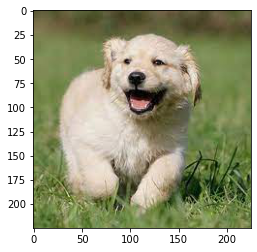

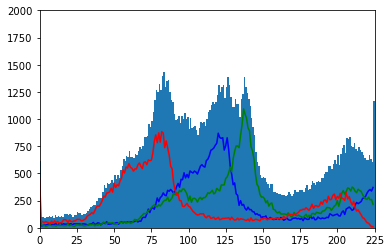

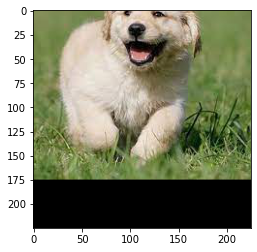

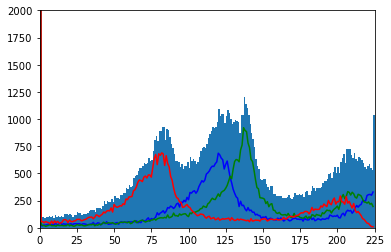

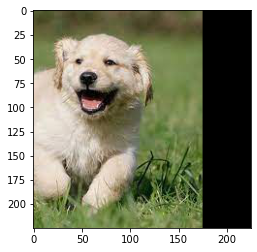

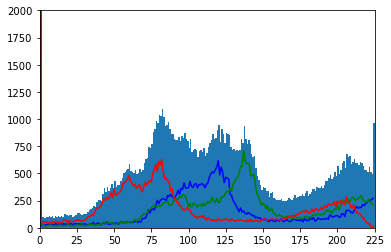

In [10]:
arr_x_trans = translate(arr, 50, 0)
arr_y_trans = translate(arr, 0, 50)
show_img(arr);
hist(arr)
show_img(arr_x_trans);
hist(arr_x_trans)
show_img(arr_y_trans);
hist(arr_y_trans)

# Cropping

In [11]:
def crop(arr, top, buttom, right, left):
    arr_bis = arr.copy()
    x, y, z = arr_bis.shape
    for i in range(x):
        for j in range(y):
            if (i in range(0+left, x-right)) and (j in range(0+buttom, y-top)):
                arr_bis[i,j] = arr[i,j]
            else:
                arr_bis[i,j] = [0, 0, 0]    
    return arr_bis

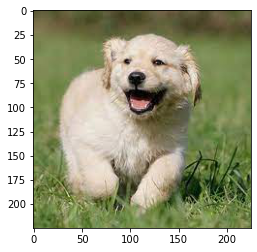

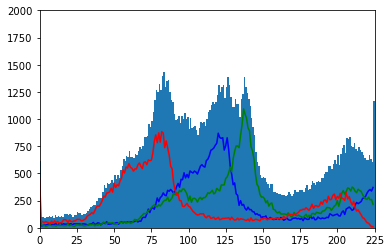

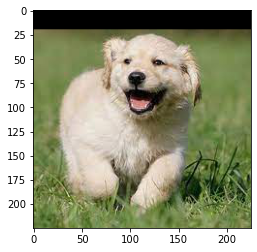

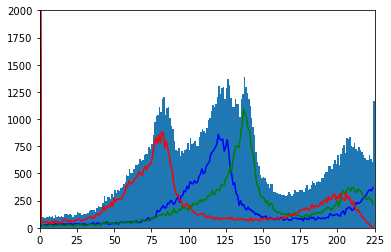

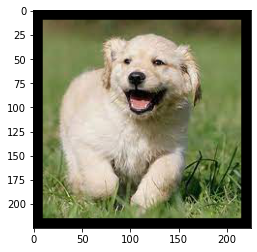

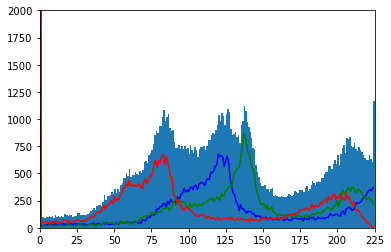

In [12]:
arr_crop_1 = crop(arr, 0, 0, 0, 20)
arr_crop_2 = crop(arr, 10, 10, 10, 10)
show_img(arr);
hist(arr)

show_img(arr_crop_1);
hist(arr_crop_1)

show_img(arr_crop_2);
hist(arr_crop_2)

# color modification

In [13]:
def eliminate_color_rgb(arr, col):
    arr_bis = arr.copy()
    x, y, z = arr_bis.shape
    for i in range(x):
        for j in range(y):
            arr_bis[i,j,col] = 0
    return arr_bis

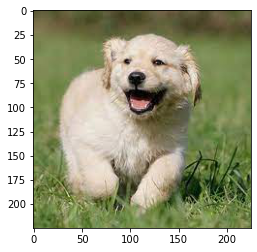

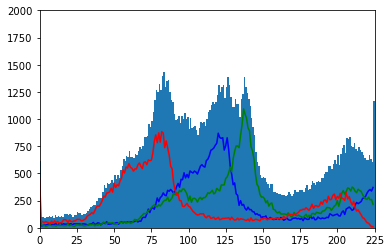

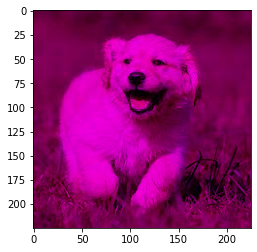

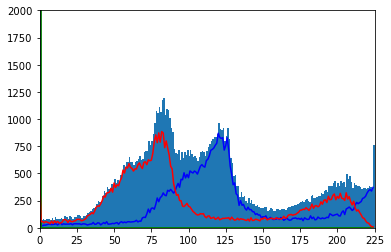

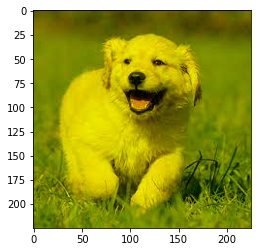

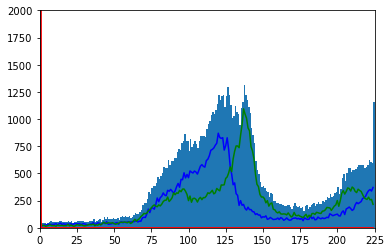

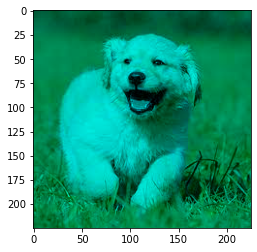

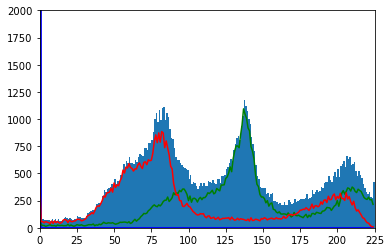

In [14]:
arr_eliminate_green = eliminate_color_rgb(arr, 1)
arr_eliminate_red = eliminate_color_rgb(arr, 2)
arr_eliminate_blue = eliminate_color_rgb(arr, 0)
show_img(arr);
hist(arr)

show_img(arr_eliminate_green);
hist(arr_eliminate_green)
show_img(arr_eliminate_red);
hist(arr_eliminate_red)
show_img(arr_eliminate_blue);
hist(arr_eliminate_blue)

# Adding illumination

In [15]:
def adding_illumination(arr, num):
    arr_bis = arr.copy()
    x, y, z = arr_bis.shape
    for i in range(x):
        for j in range(y):
            for k in range(z):
                arr_bis[i,j,k] = min(arr_bis[i,j,k]+num, 255)
    return arr_bis

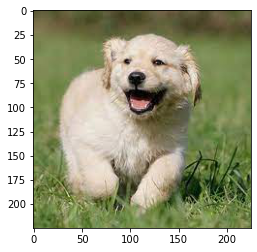

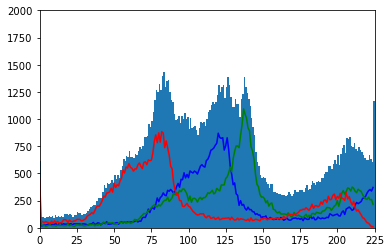

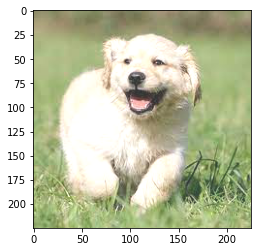

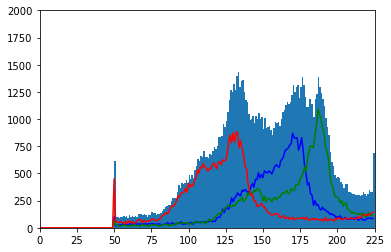

In [16]:
arr_ill_1 = adding_illumination(arr, 50)
arr_ill_2 = adding_illumination(arr, 100)
show_img(arr);
hist(arr)
show_img(arr_ill_1);
hist(arr_ill_1)


# adding noise

In [17]:
def adding_noise(arr, std):
    x = np.random.normal(0, std, (225,225,3))
    arr_bis = arr + x
    max_arr=np.amax(arr_bis)
    min_arr=np.amin(arr_bis)
    a=255/(max_arr-min_arr)
    b=-a*min_arr
    arr_bis=a*arr_bis+b
    arr_bis = np.uint8(arr_bis)
    return arr_bis

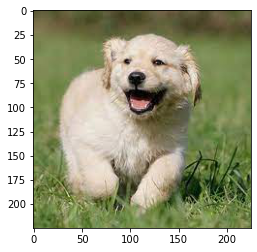

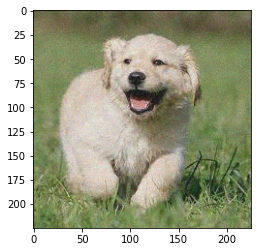

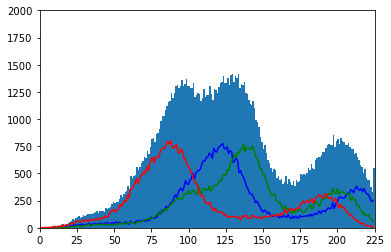

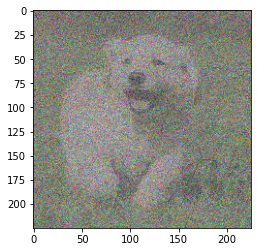

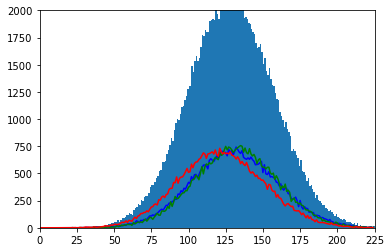

In [18]:
arr_noise_1 = adding_noise(arr, 10)
arr_noise_2 = adding_noise(arr, 100)
show_img(arr);
show_img(arr_noise_1);
hist(arr_noise_1)
show_img(arr_noise_2);
hist(arr_noise_2)

# ZOOM

In [19]:
def zoom_in(arr, fact=2):
    x,y=arr.shape[:2]
    arr_bis=arr.repeat(fact,axis=1).repeat(fact,axis=0)
    x_centre=arr_bis.shape[0]//2
    y_centre=arr_bis.shape[1]//2
    arr_bis=arr_bis[x_centre-x//2:x_centre+x//2,y_centre-y//2:y_centre+y//2]
    return(arr_bis)

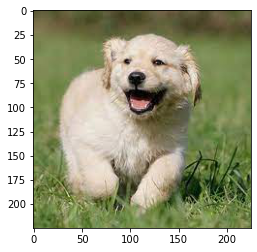

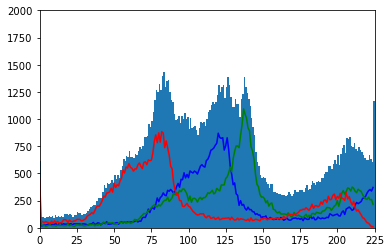

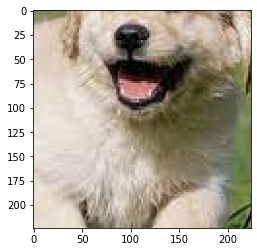

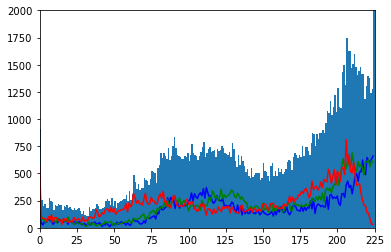

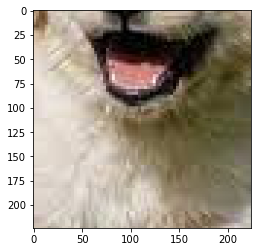

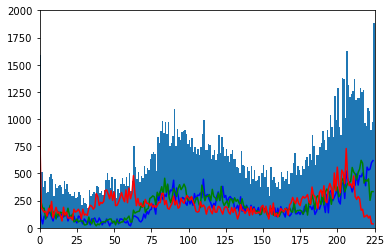

In [20]:
show_img(arr)
hist(arr)
arr_zoom_1=zoom_in(arr,2)
show_img(arr_zoom_1)
hist(arr_zoom_1)
arr_zoom_2=zoom_in(arr,3)
show_img(arr_zoom_2)
hist(arr_zoom_2)